In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [29]:
data=pd.read_csv('/Users/shivanishegokar/Downloads/emails.csv')
print(" Dataset Loaded Successfully\n")
print(data.head())


 Dataset Loaded Successfully

  Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  jay  \
0   Email 1    0   0    1    0    0   0    2    0    0  ...         0    0   
1   Email 2    8  13   24    6    6   2  102    1   27  ...         0    0   
2   Email 3    0   0    1    0    0   0    8    0    0  ...         0    0   
3   Email 4    0   5   22    0    5   1   51    2   10  ...         0    0   
4   Email 5    7   6   17    1    5   2   57    0    9  ...         0    0   

   valued  lay  infrastructure  military  allowing  ff  dry  Prediction  
0       0    0               0         0         0   0    0           0  
1       0    0               0         0         0   1    0           0  
2       0    0               0         0         0   0    0           0  
3       0    0               0         0         0   0    0           0  
4       0    0               0         0         0   1    0           0  

[5 rows x 3002 columns]


In [30]:
X = data.drop(['Email No.', 'Prediction'], axis=1)
y = data['Prediction']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
knn=KNeighborsClassifier(n_neighbors=5,metric='euclidean')
knn.fit(X_train,y_train)
y_pred_knn= knn.predict(X_test)
print("\n KNN Classifier Results (Euclidean Distance)")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))


 KNN Classifier Results (Euclidean Distance)
Accuracy: 0.8628019323671497
Confusion Matrix:
 [[645  94]
 [ 48 248]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.87      0.90       739
           1       0.73      0.84      0.78       296

    accuracy                           0.86      1035
   macro avg       0.83      0.86      0.84      1035
weighted avg       0.87      0.86      0.87      1035



In [33]:
svm = SVC(kernel='linear')
svm.fit(X_train,y_train)
y_pred_svm=svm.predict(X_test)

print("\n SVM Classifier Results")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))


 SVM Classifier Results
Accuracy: 0.9594202898550724
Confusion Matrix:
 [[715  24]
 [ 18 278]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       739
           1       0.92      0.94      0.93       296

    accuracy                           0.96      1035
   macro avg       0.95      0.95      0.95      1035
weighted avg       0.96      0.96      0.96      1035



/var/folders/16/tgp2y3sd5dl11_xp_nwrb1v40000gn/T/ipykernel_1662/2383095651.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['KNN', 'SVM'], y=[acc_knn, acc_svm], palette='viridis')


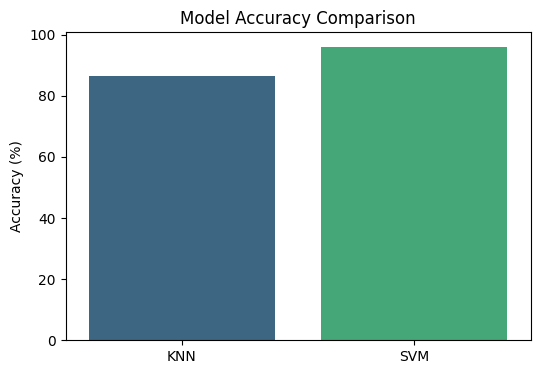


 Final Comparison:
KNN Accuracy: 86.28%
SVM Accuracy: 95.94%

 SVM performs better for this email spam dataset.


In [34]:
acc_knn = accuracy_score(y_test, y_pred_knn) * 100
acc_svm = accuracy_score(y_test, y_pred_svm) * 100

plt.figure(figsize=(6,4))
sns.barplot(x=['KNN', 'SVM'], y=[acc_knn, acc_svm], palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy (%)')
plt.show()

print("\n Final Comparison:")
print(f"KNN Accuracy: {acc_knn:.2f}%")
print(f"SVM Accuracy: {acc_svm:.2f}%")

if acc_svm > acc_knn:
    print("\n SVM performs better for this email spam dataset.")
else:
    print("\n KNN performs better for this email spam dataset.")
